In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib widget

In [10]:
from statesim.model.statespace import Linear, Nonlinear
from statesim.simulator import ContinuousSimulator, DiscreteSimulator
from statesim.system.cartpole import CartPole
from statesim.system.coupled_msd import CoupledMsd
from statesim.system.pendulum import InvertedPendulum
from statesim.analysis.plot_simulation_results import (
    plot_states,
    plot_outputs,
    plot_inputs,
    plot_comparison,
)
from statesim.configuration import GenerateConfig
from statesim.generate.input import random_static_input, gaussian_random_field
from statesim.noise import NoiseGeneration
import numpy as np
import os

# Linear System

In [18]:
config = GenerateConfig.parse_file('../../config/linear.json')
model = Linear(
    A=np.array(config.system.A),
    B=np.array(config.system.B),
    C=np.array(config.system.C),
    D=np.array(config.system.D),
)
config.system.nu = len(config.system.B[0])
config.system.nx = len(config.system.A)
config.system.ny = len(config.system.C)

sim = ContinuousSimulator(T=config.T, step_size=config.step_size)

result_directory_path = os.path.join(
    os.path.expanduser(config.result_directory),
    f'{config.base_name}_M-{config.M}_T-{int(config.T)}',
    'raw',
)
N = int(config.T / config.step_size)
us = random_static_input(
    N=N, nu=config.system.nu, config=config.input_generator
)
# us = [u.reshape(config.system.nu, 1) for u in np.zeros(shape=(N, config.system.nu))]

result = sim.simulate(
    model=model,
    initial_state=np.array(config.simulator.initial_state).reshape(
        config.system.nx, 1
    ),
    input=us,
    noise_config=config.measurement_noise,
)

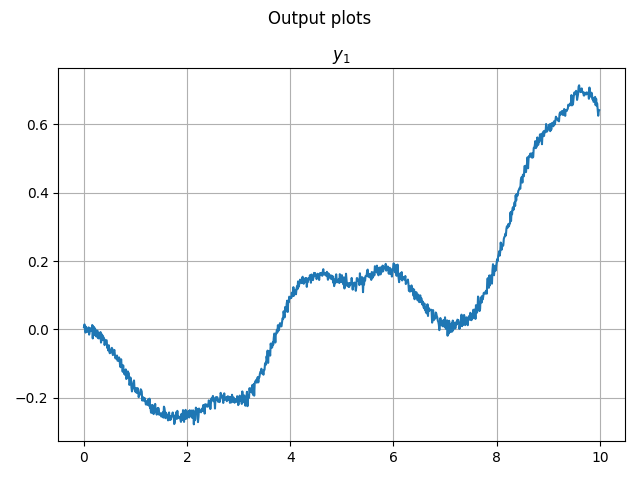

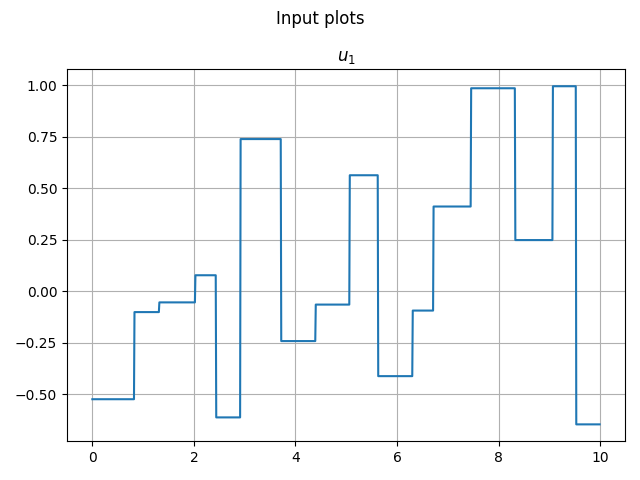

In [19]:
plot_outputs(result)
plot_inputs(result)

# Actuated pendulum

In [30]:
from statesim.analysis import plot_simulation_results as plot
from statesim.system import pendulum
sys = pendulum.ActuatedPendulum()
config = GenerateConfig.parse_file('../../config/actuated_pendulum.json')
config.input_generator
N = int(config.T / config.step_size)
us = gaussian_random_field(1, N,config.input_generator, config.step_size)

sim = ContinuousSimulator(T=config.T, step_size=config.step_size)
model = Nonlinear(
    sys.state_dynamics,
    sys.output_function,
    sys.nx,
    sys.ny,
    sys.nu
)

result = sim.simulate(
    model=model,
    initial_state=np.array(config.simulator.initial_state).reshape(
        config.system.nx, 1
    ),
    input=us,
    noise_config=config.measurement_noise,
)

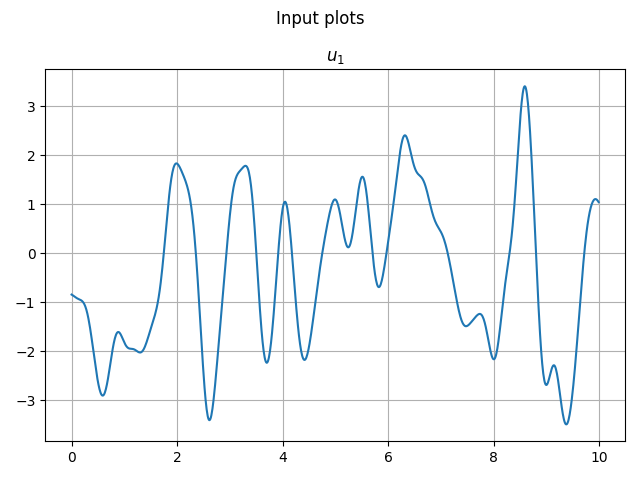

In [31]:
plot.plot_inputs(result)